In [ ]:

# Mounting Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MSCS/Deeplearning/kaggle.csv')

In [ ]:
# Preprocess the data
students_df = df[df['Target'] != 'Enrolled'].copy()
students_df['Target'] = LabelEncoder().fit_transform(students_df['Target'])

In [ ]:
# Split the data into features and target
X = students_df.iloc[:, :-1]
y = students_df['Target']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# number of columns
num_columns = len(df.columns)

# number of rows
num_rows = len(df)

# number of fields (cells) in the dataset
num_fields = num_rows * num_columns


# Print the results
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)
print("Number of fields:", num_fields)


Number of columns: 35
Number of rows: 4424
Number of fields: 154840


In [ ]:
# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy', Precision(), Recall()])


In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
91/91 [==============================] - 1s 2ms/step - loss: 0.6295 - accuracy: 0.7596 - precision: 0.7770 - recall: 0.8467
Epoch 2/100
91/91 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8585 - precision: 0.8617 - recall: 0.9131
Epoch 3/100
91/91 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8860 - precision: 0.8844 - recall: 0.9341
Epoch 4/100
91/91 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8895 - precision: 0.8883 - recall: 0.9353
Epoch 5/100
91/91 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8988 - precision: 0.8891 - recall: 0.9517
Epoch 6/100
91/91 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9029 - precision: 0.8965 - recall: 0.9495
Epoch 7/100
91/91 [==============================] - 0s 2ms/step - loss: 0.2402 - accuracy: 0.9077 - precision: 0.9011 - recall: 0.9523
Epoch 8/100
91/91 [=============================

In [ ]:
# Make predictions on the testing data
y_pred_proba = model.predict(X_test)
y_pred = np.round(y_pred_proba).flatten()

23/23 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)

Accuracy Score: 0.8911845730027548
Precision Score: 0.8950749464668094
Recall Score: 0.9330357142857143
F1 Score: 0.9136612021857924


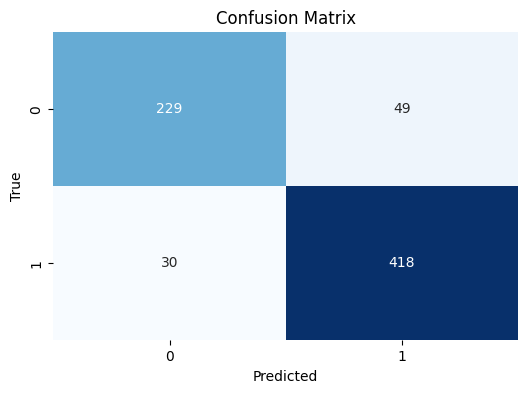

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


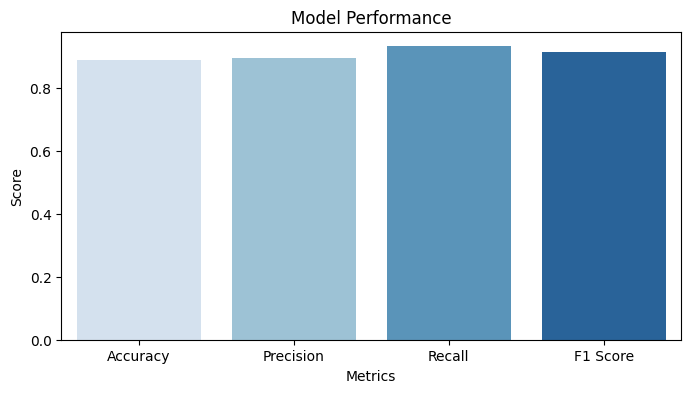

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 4))
sns.barplot(x=metrics, y=scores, palette='Blues')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance')
plt.show()
